In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [40]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [42]:
data[data.duplicated()].shape

(0, 2)

In [43]:
data[data.duplicated()]

,Delivery Time,Sorting Time


{'whiskers': [<matplotlib.lines.Line2D at 0x1f2cc91cee0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f2cc927640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f2cc91cb50>,
 'medians': [<matplotlib.lines.Line2D at 0x1f2cc927d60>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f2cc934130>,
 'means': []}

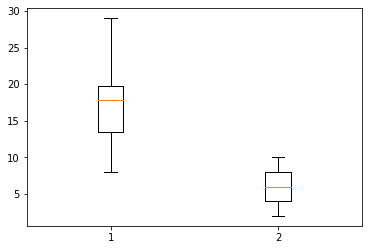

In [44]:
plt.boxplot(data)

C:\Users\Rakshith\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

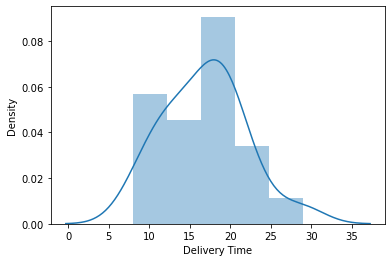

In [45]:
import seaborn as sns
sns.distplot(data['Delivery Time'])

In [46]:
#mean imputation
mean=data.mean()
print(mean)


Delivery Time    16.790952
Sorting Time      6.190476
dtype: float64


In [47]:
median=data.median()
print(median)

Delivery Time    17.83
Sorting Time      6.00
dtype: float64


C:\Users\Rakshith\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

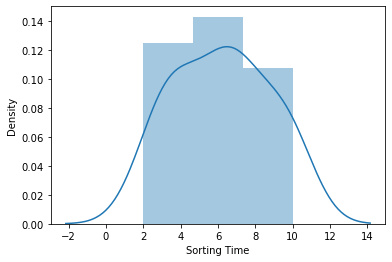

In [48]:
import seaborn as sns
sns.distplot(data['Sorting Time'])

In [49]:
import statsmodels.formula.api as smf
X=data.rename(columns={'Sorting Time':'A','Delivery Time':'B'},inplace= True)
model = smf.ols("B~A",data=data).fit()


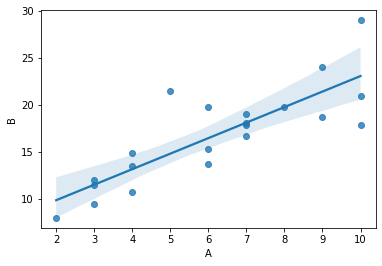

In [50]:
sns.regplot(x='A', y='B', data=data);

In [51]:
model.params

Intercept    6.582734
A            1.649020
dtype: float64

In [52]:
#y= Bo+B1*x ->Regression equation
#delivery time= 6.58+1.649*sorting time

In [53]:
(model.rsquared)

0.6822714748417231

In [54]:
print(model.tvalues,'\n',model.pvalues)

Intercept    3.823349
A            6.387447
dtype: float64 
 Intercept    0.001147
A            0.000004
dtype: float64


In [55]:
#tvalue= 3.8233, 6.387.
#pvalue= 0.0011, 0.000004<0.05
#Variable A plays a significant role in this model

In [56]:
#Prediciting the delivery time for various sorting time

d1=pd.Series([12,15,10,20,30,40,50])
Pred_data=pd.DataFrame(d1,columns=['A'])
model.predict(Pred_data)

0    26.370973
1    31.318032
2    23.072933
3    39.563132
4    56.053331
5    72.543530
6    89.033729
dtype: float64